In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating"

In [3]:
page=requests.get(url)
page

<Response [200]>

In [4]:
hmtl=page.text

In [5]:
soup=BeautifulSoup(hmtl)

In [6]:
soup.find_all("div")

[<div class="imdb-header__login-state-node" id="nblogin"></div>,
 <div class="ipc-page-content-container ipc-page-content-container--center navbar__inner" role="presentation"><label aria-disabled="false" aria-label="Open Navigation Drawer" class="ipc-responsive-button ipc-btn--theme-baseAlt ipc-responsive-button--transition-l ipc-btn--on-textPrimary ipc-responsive-button--single-padding sc-dIouRR eSXHLQ hamburger__icon" for="imdbHeader-navDrawer" id="imdbHeader-navDrawerOpen" role="button" tabindex="0"><svg class="ipc-icon ipc-icon--menu ipc-responsive-button__icon" fill="currentColor" height="24" id="iconContext-menu" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M0 0h24v24H0V0z" fill="none"></path><path d="M4 18h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1s.45 1 1 1zm0-5h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1s.45 1 1 1zM3 7c0 .55.45 1 1 1h16c.55 0 1-.45 1-1s-.45-1-1-1H4c-.55 0-1 .45-1 1z"></path></svg><span class="ipc-res

In [7]:
info=soup.find_all("div",class_="lister-item-content")
info

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">142 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Drama            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="9.3" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>9.3</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt0111161" id="urv_tt0111161">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt0111161">
 <div cl

In [8]:
movie_info=soup.find_all("div",attrs={"class":"lister-item mode-advanced"})

In [53]:
movie_info

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt0111161"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" class="loadlate" data-tconst="tt0111161" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">A</span>
 <span class="ghost">|</span>
 <span class="runtime">142 min</span>
 <span class="ghost">|</span>
 <span 

In [204]:
movie_name=[]
for i in movie_info:
    name=i.h3.a.text
    movie_name.append(name)

In [205]:
movie_name

['The Shawshank Redemption',
 'The Godfather',
 'Kantara',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'The Godfather Part II',
 '12 Angry Men',
 'Jai Bhim',
 'Pulp Fiction',
 'Rocketry: The Nambi Effect',
 'Inception',
 'The Lord of the Rings: The Two Towers',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'Il buono, il brutto, il cattivo',
 'Soorarai Pottru',
 'The Matrix',
 'Goodfellas',
 'The Empire Strikes Back',
 "One Flew Over the Cuckoo's Nest",
 'Interstellar',
 'Cidade de Deus',
 'Sen to Chihiro no kamikakushi',
 'Saving Private Ryan',
 'The Green Mile',
 'La vita è bella',
 'Se7en',
 'Terminator 2: Judgment Day',
 'The Silence of the Lambs',
 'Star Wars',
 'Seppuku',
 'Shichinin no samurai',
 "It's a Wonderful Life",
 'Kaithi',
 'Asuran',
 '96',
 'Gisaengchung',
 'Whiplash',
 'Sita Ramam',
 'The Intouchables',
 'The Prestige',
 'The Departed',
 'The Pianist',
 'Gladiator',
 'American Hist

In [206]:
year_release=[]
for i in info:
    year=i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
    year_release.append(year)

In [207]:
year_release

['1994',
 '1972',
 '2022',
 '2008',
 '2003',
 '1993',
 '1974',
 '1957',
 '2021',
 '1994',
 '2022',
 '2010',
 '2002',
 '1999',
 '2001',
 '1994',
 '1966',
 '2020',
 '1999',
 '1990',
 '1980',
 '1975',
 '2014',
 '2002',
 '2001',
 '1998',
 '1999',
 '1997',
 '1995',
 '1991',
 '1991',
 '1977',
 '1962',
 '1954',
 '1946',
 '2019',
 '2019',
 'II 2018',
 '2019',
 '2014',
 '2022',
 '2011',
 '2006',
 '2006',
 '2002',
 '2000',
 '1998',
 '1995',
 '1994',
 '1994']

In [208]:
time_period=[]
for i in info:
    time=i.p.find('span',class_='runtime').text.replace('min','').replace(' ','')
    time_period.append(time)

In [209]:
time_period

['142',
 '175',
 '148',
 '152',
 '201',
 '195',
 '202',
 '96',
 '164',
 '154',
 '157',
 '148',
 '179',
 '139',
 '178',
 '142',
 '161',
 '153',
 '136',
 '145',
 '124',
 '133',
 '169',
 '130',
 '125',
 '169',
 '189',
 '116',
 '127',
 '137',
 '118',
 '121',
 '133',
 '207',
 '130',
 '145',
 '141',
 '158',
 '132',
 '106',
 '163',
 '112',
 '130',
 '151',
 '150',
 '155',
 '119',
 '106',
 '110',
 '88']

In [210]:
rating=[]
for i in info:
    rate=i.find('div',class_='inline-block ratings-imdb-rating').text.replace('\n','')
    rating.append(rate)

In [211]:
rating

['9.3',
 '9.2',
 '9.1',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5']

In [212]:
meta_score=[]
for i in info:
     meta=i.find('span',class_="metascore").text.replace(' ','') if i.find('span',class_="metascore") else '**' 
     meta_score.append(meta)

In [213]:
meta_score

['81',
 '100',
 '**',
 '84',
 '94',
 '94',
 '90',
 '96',
 '**',
 '94',
 '**',
 '74',
 '87',
 '66',
 '92',
 '82',
 '90',
 '**',
 '73',
 '90',
 '82',
 '84',
 '74',
 '79',
 '96',
 '91',
 '61',
 '59',
 '65',
 '75',
 '85',
 '90',
 '85',
 '98',
 '89',
 '**',
 '**',
 '**',
 '96',
 '89',
 '**',
 '57',
 '66',
 '85',
 '85',
 '67',
 '62',
 '77',
 '64',
 '88']

In [214]:
collection=[]
for i in info:
    gross_collection=i.find('span',attrs={'name':'nv'}).text
    collection.append(gross_collection)

In [215]:
collection

['2,661,143',
 '1,844,220',
 '66,172',
 '2,634,080',
 '1,834,952',
 '1,347,792',
 '1,263,371',
 '785,802',
 '200,905',
 '2,036,925',
 '49,207',
 '2,334,117',
 '1,656,864',
 '2,106,438',
 '1,863,862',
 '2,062,230',
 '758,605',
 '116,401',
 '1,901,666',
 '1,153,192',
 '1,285,298',
 '1,003,847',
 '1,807,043',
 '754,409',
 '758,028',
 '1,383,100',
 '1,293,117',
 '691,980',
 '1,640,021',
 '1,093,630',
 '1,423,787',
 '1,357,886',
 '57,182',
 '345,461',
 '454,022',
 '32,206',
 '29,587',
 '31,431',
 '790,595',
 '850,922',
 '41,878',
 '853,392',
 '1,325,676',
 '1,317,877',
 '827,404',
 '1,491,424',
 '1,118,132',
 '1,081,062',
 '1,154,820',
 '1,052,295']

In [216]:
director_name=[]
for i in info:
    director=i.find('p',class_='').text.replace('\n','').replace(' ','').split('|')
    director_name.append(director)
    

In [217]:
import re
director_name[0][0]


'Director:FrankDarabont'

In [218]:

o=director_name[0][1]
p=re.findall(r':(\w+)',o)
print(p)

['TimRobbins']


In [219]:
director_final=[]
for i in range(len(director_name)):
    b=director_name[i][0]
    director_final.append(re.findall(r':(\w+)',b))
    

In [220]:
director_final

[['FrankDarabont'],
 ['FrancisFordCoppola'],
 ['RishabShetty'],
 ['ChristopherNolan'],
 ['PeterJackson'],
 ['StevenSpielberg'],
 ['FrancisFordCoppola'],
 ['SidneyLumet'],
 ['T'],
 ['QuentinTarantino'],
 ['Madhavan'],
 ['ChristopherNolan'],
 ['PeterJackson'],
 ['DavidFincher'],
 ['PeterJackson'],
 ['RobertZemeckis'],
 ['SergioLeone'],
 ['SudhaKongara'],
 ['LanaWachowski'],
 ['MartinScorsese'],
 ['IrvinKershner'],
 ['MilosForman'],
 ['ChristopherNolan'],
 ['FernandoMeirelles'],
 ['HayaoMiyazaki'],
 ['StevenSpielberg'],
 ['FrankDarabont'],
 ['RobertoBenigni'],
 ['DavidFincher'],
 ['JamesCameron'],
 ['JonathanDemme'],
 ['GeorgeLucas'],
 ['MasakiKobayashi'],
 ['AkiraKurosawa'],
 ['FrankCapra'],
 ['LokeshKanagaraj'],
 ['Vetrimaaran'],
 ['C'],
 ['BongJoonHo'],
 ['DamienChazelle'],
 ['HanuRaghavapudi'],
 ['OlivierNakache'],
 ['ChristopherNolan'],
 ['MartinScorsese'],
 ['RomanPolanski'],
 ['RidleyScott'],
 ['TonyKaye'],
 ['BryanSinger'],
 ['LucBesson'],
 ['RogerAllers']]

In [221]:
stars_final=[]
for i in range(len(director_name)):
    b=director_name[i][1]
    stars_final.append(re.findall(r':(\w+.+)',b))

In [222]:
stars_final

[['TimRobbins,MorganFreeman,BobGunton,WilliamSadler'],
 ['MarlonBrando,AlPacino,JamesCaan,DianeKeaton'],
 ['RishabShetty,SapthamiGowda,KishoreKumarG.,AchyuthKumar'],
 ['ChristianBale,HeathLedger,AaronEckhart,MichaelCaine'],
 ['ElijahWood,ViggoMortensen,IanMcKellen,OrlandoBloom'],
 ['LiamNeeson,RalphFiennes,BenKingsley,CarolineGoodall'],
 ['AlPacino,RobertDeNiro,RobertDuvall,DianeKeaton'],
 ['HenryFonda,LeeJ.Cobb,MartinBalsam,JohnFiedler'],
 ['Suriya,LijoMolJose,ManikandanK.,RajishaVijayan'],
 ['JohnTravolta,UmaThurman,SamuelL.Jackson,BruceWillis'],
 ['Madhavan,Simran,RajitKapoor,RaviRaghavendra'],
 ['LeonardoDiCaprio,JosephGordon-Levitt,ElliotPage,KenWatanabe'],
 ['ElijahWood,IanMcKellen,ViggoMortensen,OrlandoBloom'],
 ['BradPitt,EdwardNorton,MeatLoaf,ZachGrenier'],
 ['ElijahWood,IanMcKellen,OrlandoBloom,SeanBean'],
 ['TomHanks,RobinWright,GarySinise,SallyField'],
 ['ClintEastwood,EliWallach,LeeVanCleef,AldoGiuffrè'],
 ['Suriya,AchyuthKumar,PareshRawal,AparnaBalamurali'],
 ['KeanuReeve

In [223]:
len(movie_name)

50

In [224]:
len(year_release)
len(time_period)
len(rating)
len(meta_score)
len(collection)
len(director_name)
len(stars)

0

In [225]:
imdb_data_frame=pd.DataFrame({'Name_of_movie': movie_name ,'Year_Of_Release':year_release ,'Duration':time_period ,'Rating':rating ,'Meta_score':meta_score ,'Collection':collection,'Directors':director_final,'Stars':stars_final})                     


In [298]:
imdb_data_frame 

Name of movie  Year Time duration Rating  \
0                         The Shawshank Redemption  1994           142    9.3   
1                                    The Godfather  1972           175    9.2   
2                                          Kantara  2022           148    9.1   
3                                  The Dark Knight  2008           152    9.0   
4    The Lord of the Rings: The Return of the King  2003           201    9.0   
..                                             ...   ...           ...    ...   
345                                      Gladiator  2000           155    8.5   
346                             American History X  1998           119    8.5   
347                             The Usual Suspects  1995           106    8.5   
348                                           Léon  1994           110    8.5   
349                                  The Lion King  1994            88    8.5   

    Meta score Collection             Directors  \
0           81  2,661,143       [FrankDarabont]   
1          100  1,844,220  [FrancisFordCoppola]   
2           **     66,172        [RishabShetty]   
3           84  2,634,080    [ChristopherNolan]   
4           94  1,834,952        [PeterJackson]   
..         ...        ...                   ...   
345         67  1,491,424         [RidleyScott]   
346         62  1,118,132            [TonyKaye]   
347         77  1,081,062         [BryanSinger]   
348         64  1,154,820           [LucBesson]   
349         88  1,052,295         [RogerAllers]   

                                                 stars  
0    [TimRobbins,MorganFreeman,BobGunton,WilliamSad...  
1        [MarlonBrando,AlPacino,JamesCaan,DianeKeaton]  
2    [RishabShetty,SapthamiGowda,KishoreKumarG.,Ach...  
3    [ChristianBale,HeathLedger,AaronEckhart,Michae...  
4    [ElijahWood,ViggoMortensen,IanMcKellen,Orlando...  
..                                                 ...  
345  [RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oli...  
346  [EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Je...  
347  [KevinSpacey,GabrielByrne,ChazzPalminteri,Step...  
348   [JeanReno,GaryOldman,NataliePortman,DannyAiello]  
349  [MatthewBroderick,JeremyIrons,JamesEarlJones,W...  

[350 rows x 8 columns]

In [299]:
a="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&page="

In [300]:
a

'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&page='

In [310]:
imdb_data_frame['Meta score'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       81
1      100
2       **
3       84
4       94
      ... 
345     67
346     62
347     77
348     64
349     88
Name: Meta score, Length: 350, dtype: object>

In [231]:
imdb_data_frame.replace('**','41')

Name_of_movie Year_Of_Release  \
0                            The Shawshank Redemption            1994   
1                                       The Godfather            1972   
2                                             Kantara            2022   
3                                     The Dark Knight            2008   
4       The Lord of the Rings: The Return of the King            2003   
5                                    Schindler's List            1993   
6                               The Godfather Part II            1974   
7                                        12 Angry Men            1957   
8                                            Jai Bhim            2021   
9                                        Pulp Fiction            1994   
10                         Rocketry: The Nambi Effect            2022   
11                                          Inception            2010   
12              The Lord of the Rings: The Two Towers            2002   
13                                         Fight Club            1999   
14  The Lord of the Rings: The Fellowship of the Ring            2001   
15                                       Forrest Gump            1994   
16                    Il buono, il brutto, il cattivo            1966   
17                                    Soorarai Pottru            2020   
18                                         The Matrix            1999   
19                                         Goodfellas            1990   
20                            The Empire Strikes Back            1980   
21                    One Flew Over the Cuckoo's Nest            1975   
22                                       Interstellar            2014   
23                                     Cidade de Deus            2002   
24                      Sen to Chihiro no kamikakushi            2001   
25                                Saving Private Ryan            1998   
26                                     The Green Mile            1999   
27                                    La vita è bella            1997   
28                                              Se7en            1995   
29                         Terminator 2: Judgment Day            1991   
30                           The Silence of the Lambs            1991   
31                                          Star Wars            1977   
32                                            Seppuku            1962   
33                               Shichinin no samurai            1954   
34                              It's a Wonderful Life            1946   
35                                             Kaithi            2019   
36                                             Asuran            2019   
37                                                 96         II 2018   
38                                       Gisaengchung            2019   
39                                           Whiplash            2014   
40                                         Sita Ramam            2022   
41                                   The Intouchables            2011   
42                                       The Prestige            2006   
43                                       The Departed            2006   
44                                        The Pianist            2002   
45                                          Gladiator            2000   
46                                 American History X            1998   
47                                 The Usual Suspects            1995   
48                                               Léon            1994   
49                                      The Lion King            1994   

   Duration Rating Meta_score Collection             Directors  \
0       142    9.3         81  2,661,143       [FrankDarabont]   
1       175    9.2        100  1,844,220  [FrancisFordCoppola]   
2       148    9.1         41     66,172        [RishabShetty]   
3       152    9.0         84  2,634,080    [Christo

## Scraping

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [13]:
movie_name=[]
year_release=[]
time_period=[]
rating=[]
meta_score=[]
collection=[]
director_name=[]
for i in range(1,8):
    a="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating&page="
    url = a+str(i)
    #print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    p = soup.find_all("div",class_="lister-item mode-advanced")
    movie_info=soup.find_all("div",attrs={"class":"lister-item mode-advanced"})
    for i in movie_info:
        name=i.h3.a.text
        movie_name.append(name)
    
    for i in info:
        year=i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        year_release.append(year)
    
    for i in info:
        time=i.p.find('span',class_='runtime').text.replace('min','').replace(' ','')
        time_period.append(time)
    
    for i in info:
        rate=i.find('div',class_='inline-block ratings-imdb-rating').text.replace('\n','')
        rating.append(rate)
    
    for i in info:
         meta=i.find('span',class_="metascore").text.replace(' ','') if i.find('span',class_="metascore") else '**'
         meta_score.append(meta)
        
        
        
    for i in info:
        gross_collection=i.find('span',attrs={'name':'nv'}).text
        collection.append(gross_collection)
    
    for i in info:
        director=i.find('p',class_='').text.replace('\n','').replace(' ','').split('|')
        director_name.append(director)
        
    director_final=[]
    for i in range(len(director_name)):
        b=director_name[i][0]
        director_final.append(re.findall(r':(\w+)',b))
        
        
    stars_final=[]
    for i in range(len(director_name)):
        b=director_name[i][1]
        stars_final.append(re.findall(r':(\w+.+)',b))
    

In [14]:
imdb_data_frame=pd.DataFrame({'Name of movie': movie_name ,'Year':year_release ,'Time duration':time_period ,'Rating':rating ,'Meta score':meta_score ,'Collection':collection ,'Directors':director_final,'stars':stars_final})                       


In [15]:
imdb_data_frame

Name of movie  Year Time duration Rating  \
0                         The Shawshank Redemption  1994           142    9.3   
1                                    The Godfather  1972           175    9.2   
2                                          Kantara  2022           148    9.0   
3                                  The Dark Knight  2008           152    9.0   
4    The Lord of the Rings: The Return of the King  2003           201    9.0   
..                                             ...   ...           ...    ...   
345                                      Gladiator  2000           155    8.5   
346                             American History X  1998           119    8.5   
347                             The Usual Suspects  1995           106    8.5   
348                                           Léon  1994           110    8.5   
349                                  The Lion King  1994            88    8.5   

    Meta score Collection             Directors  \
0           81  2,662,355       [FrankDarabont]   
1          100  1,845,051  [FrancisFordCoppola]   
2           **     67,317        [RishabShetty]   
3           84  2,635,376    [ChristopherNolan]   
4           94  1,835,709        [PeterJackson]   
..         ...        ...                   ...   
345         67  1,491,990         [RidleyScott]   
346         62  1,118,467            [TonyKaye]   
347         77  1,081,401         [BryanSinger]   
348         64  1,155,309           [LucBesson]   
349         88  1,052,739         [RogerAllers]   

                                                 stars  
0    [TimRobbins,MorganFreeman,BobGunton,WilliamSad...  
1        [MarlonBrando,AlPacino,JamesCaan,DianeKeaton]  
2    [RishabShetty,SapthamiGowda,KishoreKumarG.,Ach...  
3    [ChristianBale,HeathLedger,AaronEckhart,Michae...  
4    [ElijahWood,ViggoMortensen,IanMcKellen,Orlando...  
..                                                 ...  
345  [RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oli...  
346  [EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Je...  
347  [KevinSpacey,GabrielByrne,ChazzPalminteri,Step...  
348   [JeanReno,GaryOldman,NataliePortman,DannyAiello]  
349  [MatthewBroderick,JeremyIrons,JamesEarlJones,W...  

[350 rows x 8 columns]

In [16]:
imdb_data_frame=imdb_data_frame.replace('**','41')
imdb_data_frame

Name of movie  Year Time duration Rating  \
0                         The Shawshank Redemption  1994           142    9.3   
1                                    The Godfather  1972           175    9.2   
2                                          Kantara  2022           148    9.0   
3                                  The Dark Knight  2008           152    9.0   
4    The Lord of the Rings: The Return of the King  2003           201    9.0   
..                                             ...   ...           ...    ...   
345                                      Gladiator  2000           155    8.5   
346                             American History X  1998           119    8.5   
347                             The Usual Suspects  1995           106    8.5   
348                                           Léon  1994           110    8.5   
349                                  The Lion King  1994            88    8.5   

    Meta score Collection             Directors  \
0           81  2,662,355       [FrankDarabont]   
1          100  1,845,051  [FrancisFordCoppola]   
2           41     67,317        [RishabShetty]   
3           84  2,635,376    [ChristopherNolan]   
4           94  1,835,709        [PeterJackson]   
..         ...        ...                   ...   
345         67  1,491,990         [RidleyScott]   
346         62  1,118,467            [TonyKaye]   
347         77  1,081,401         [BryanSinger]   
348         64  1,155,309           [LucBesson]   
349         88  1,052,739         [RogerAllers]   

                                                 stars  
0    [TimRobbins,MorganFreeman,BobGunton,WilliamSad...  
1        [MarlonBrando,AlPacino,JamesCaan,DianeKeaton]  
2    [RishabShetty,SapthamiGowda,KishoreKumarG.,Ach...  
3    [ChristianBale,HeathLedger,AaronEckhart,Michae...  
4    [ElijahWood,ViggoMortensen,IanMcKellen,Orlando...  
..                                                 ...  
345  [RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oli...  
346  [EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Je...  
347  [KevinSpacey,GabrielByrne,ChazzPalminteri,Step...  
348   [JeanReno,GaryOldman,NataliePortman,DannyAiello]  
349  [MatthewBroderick,JeremyIrons,JamesEarlJones,W...  

[350 rows x 8 columns]

# Data cleaning

In [17]:
imdb_data_frame['Year'] = imdb_data_frame['Year'].apply(lambda x:int(re.findall(r'\d+',x)[0]))

In [18]:
a=[]
for i in imdb_data_frame['Year']:
    b=i.replace('II 2018','2018')
    a.append(int(b))
    

AttributeError: 'int' object has no attribute 'replace'

In [19]:
c=[]
for i in imdb_data_frame['Time duration']:
    c.append(int(i))
imdb_data_frame['Time duration']=c

In [20]:
d=[]
for i in imdb_data_frame['Rating']:
    d.append(float(i))
imdb_data_frame['Rating']=d

In [21]:
m=[]
for i in imdb_data_frame['Meta score']:
    m.append(float(i))
imdb_data_frame['Meta score']=m

In [22]:
l=[]
for i in imdb_data_frame['Collection']:
    x=i.replace(',','')
    l.append(x)
imdb_data_frame['Collection']=l

In [23]:
f=[]
for i in imdb_data_frame['Collection']:
    f.append(int(i))
imdb_data_frame['Collection']=f

In [24]:
imdb_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name of movie  350 non-null    object 
 1   Year           350 non-null    int64  
 2   Time duration  350 non-null    int64  
 3   Rating         350 non-null    float64
 4   Meta score     350 non-null    float64
 5   Collection     350 non-null    int64  
 6   Directors      350 non-null    object 
 7   stars          350 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 22.0+ KB


In [25]:
imdb_data_frame

Name of movie  Year  Time duration  \
0                         The Shawshank Redemption  1994            142   
1                                    The Godfather  1972            175   
2                                          Kantara  2022            148   
3                                  The Dark Knight  2008            152   
4    The Lord of the Rings: The Return of the King  2003            201   
..                                             ...   ...            ...   
345                                      Gladiator  2000            155   
346                             American History X  1998            119   
347                             The Usual Suspects  1995            106   
348                                           Léon  1994            110   
349                                  The Lion King  1994             88   

     Rating  Meta score  Collection             Directors  \
0       9.3        81.0     2662355       [FrankDarabont]   
1       9.2       100.0     1845051  [FrancisFordCoppola]   
2       9.0        41.0       67317        [RishabShetty]   
3       9.0        84.0     2635376    [ChristopherNolan]   
4       9.0        94.0     1835709        [PeterJackson]   
..      ...         ...         ...                   ...   
345     8.5        67.0     1491990         [RidleyScott]   
346     8.5        62.0     1118467            [TonyKaye]   
347     8.5        77.0     1081401         [BryanSinger]   
348     8.5        64.0     1155309           [LucBesson]   
349     8.5        88.0     1052739         [RogerAllers]   

                                                 stars  
0    [TimRobbins,MorganFreeman,BobGunton,WilliamSad...  
1        [MarlonBrando,AlPacino,JamesCaan,DianeKeaton]  
2    [RishabShetty,SapthamiGowda,KishoreKumarG.,Ach...  
3    [ChristianBale,HeathLedger,AaronEckhart,Michae...  
4    [ElijahWood,ViggoMortensen,IanMcKellen,Orlando...  
..                                                 ...  
345  [RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oli...  
346  [EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Je...  
347  [KevinSpacey,GabrielByrne,ChazzPalminteri,Step...  
348   [JeanReno,GaryOldman,NataliePortman,DannyAiello]  
349  [MatthewBroderick,JeremyIrons,JamesEarlJones,W...  

[350 rows x 8 columns]

In [26]:
dir = []
for i in imdb_data_frame['Directors']:
    dir.append(i[0])

In [27]:
dir

['FrankDarabont',
 'FrancisFordCoppola',
 'RishabShetty',
 'ChristopherNolan',
 'PeterJackson',
 'StevenSpielberg',
 'FrancisFordCoppola',
 'SidneyLumet',
 'KiranrajK',
 'T',
 'QuentinTarantino',
 'Madhavan',
 'ChristopherNolan',
 'PeterJackson',
 'DavidFincher',
 'PeterJackson',
 'RobertZemeckis',
 'SergioLeone',
 'SudhaKongara',
 'LanaWachowski',
 'MartinScorsese',
 'IrvinKershner',
 'MilosForman',
 'ChristopherNolan',
 'FernandoMeirelles',
 'HayaoMiyazaki',
 'StevenSpielberg',
 'FrankDarabont',
 'RobertoBenigni',
 'DavidFincher',
 'JamesCameron',
 'JonathanDemme',
 'GeorgeLucas',
 'MasakiKobayashi',
 'AkiraKurosawa',
 'FrankCapra',
 'LokeshKanagaraj',
 'C',
 'BongJoonHo',
 'DamienChazelle',
 'HanuRaghavapudi',
 'OlivierNakache',
 'ChristopherNolan',
 'MartinScorsese',
 'RomanPolanski',
 'RidleyScott',
 'TonyKaye',
 'BryanSinger',
 'LucBesson',
 'RogerAllers',
 'FrankDarabont',
 'FrancisFordCoppola',
 'RishabShetty',
 'ChristopherNolan',
 'PeterJackson',
 'StevenSpielberg',
 'Francis

In [28]:
imdb_data_frame['Directors'] = dir

In [29]:
imdb_data_frame

Name of movie  Year  Time duration  \
0                         The Shawshank Redemption  1994            142   
1                                    The Godfather  1972            175   
2                                          Kantara  2022            148   
3                                  The Dark Knight  2008            152   
4    The Lord of the Rings: The Return of the King  2003            201   
..                                             ...   ...            ...   
345                                      Gladiator  2000            155   
346                             American History X  1998            119   
347                             The Usual Suspects  1995            106   
348                                           Léon  1994            110   
349                                  The Lion King  1994             88   

     Rating  Meta score  Collection           Directors  \
0       9.3        81.0     2662355       FrankDarabont   
1       9.2       100.0     1845051  FrancisFordCoppola   
2       9.0        41.0       67317        RishabShetty   
3       9.0        84.0     2635376    ChristopherNolan   
4       9.0        94.0     1835709        PeterJackson   
..      ...         ...         ...                 ...   
345     8.5        67.0     1491990         RidleyScott   
346     8.5        62.0     1118467            TonyKaye   
347     8.5        77.0     1081401         BryanSinger   
348     8.5        64.0     1155309           LucBesson   
349     8.5        88.0     1052739         RogerAllers   

                                                 stars  
0    [TimRobbins,MorganFreeman,BobGunton,WilliamSad...  
1        [MarlonBrando,AlPacino,JamesCaan,DianeKeaton]  
2    [RishabShetty,SapthamiGowda,KishoreKumarG.,Ach...  
3    [ChristianBale,HeathLedger,AaronEckhart,Michae...  
4    [ElijahWood,ViggoMortensen,IanMcKellen,Orlando...  
..                                                 ...  
345  [RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oli...  
346  [EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Je...  
347  [KevinSpacey,GabrielByrne,ChazzPalminteri,Step...  
348   [JeanReno,GaryOldman,NataliePortman,DannyAiello]  
349  [MatthewBroderick,JeremyIrons,JamesEarlJones,W...  

[350 rows x 8 columns]

In [30]:
sta = []
for i in imdb_data_frame['stars']:
    sta.append(i[0])

In [31]:
sta

['TimRobbins,MorganFreeman,BobGunton,WilliamSadler',
 'MarlonBrando,AlPacino,JamesCaan,DianeKeaton',
 'RishabShetty,SapthamiGowda,KishoreKumarG.,AchyuthKumar',
 'ChristianBale,HeathLedger,AaronEckhart,MichaelCaine',
 'ElijahWood,ViggoMortensen,IanMcKellen,OrlandoBloom',
 'LiamNeeson,RalphFiennes,BenKingsley,CarolineGoodall',
 'AlPacino,RobertDeNiro,RobertDuvall,DianeKeaton',
 'HenryFonda,LeeJ.Cobb,MartinBalsam,JohnFiedler',
 'RakshitShetty,Charlie,SangeethaSringeri,RajB.Shetty',
 'Suriya,LijoMolJose,ManikandanK.,RajishaVijayan',
 'JohnTravolta,UmaThurman,SamuelL.Jackson,BruceWillis',
 'Madhavan,Simran,RajitKapoor,RaviRaghavendra',
 'LeonardoDiCaprio,JosephGordon-Levitt,ElliotPage,KenWatanabe',
 'ElijahWood,IanMcKellen,ViggoMortensen,OrlandoBloom',
 'BradPitt,EdwardNorton,MeatLoaf,ZachGrenier',
 'ElijahWood,IanMcKellen,OrlandoBloom,SeanBean',
 'TomHanks,RobinWright,GarySinise,SallyField',
 'ClintEastwood,EliWallach,LeeVanCleef,AldoGiuffrè',
 'Suriya,AchyuthKumar,PareshRawal,AparnaBalamu

In [32]:
imdb_data_frame['stars']=sta

In [47]:
imdb_data_frame

Name of movie  Year  Time duration  \
0                         The Shawshank Redemption  1994            142   
1                                    The Godfather  1972            175   
2                                          Kantara  2022            148   
3                                  The Dark Knight  2008            152   
4    The Lord of the Rings: The Return of the King  2003            201   
..                                             ...   ...            ...   
345                                      Gladiator  2000            155   
346                             American History X  1998            119   
347                             The Usual Suspects  1995            106   
348                                           Léon  1994            110   
349                                  The Lion King  1994             88   

     Rating  Meta score  Collection           Directors  \
0       9.3        81.0     2662355       FrankDarabont   
1       9.2       100.0     1845051  FrancisFordCoppola   
2       9.0        41.0       67317        RishabShetty   
3       9.0        84.0     2635376    ChristopherNolan   
4       9.0        94.0     1835709        PeterJackson   
..      ...         ...         ...                 ...   
345     8.5        67.0     1491990         RidleyScott   
346     8.5        62.0     1118467            TonyKaye   
347     8.5        77.0     1081401         BryanSinger   
348     8.5        64.0     1155309           LucBesson   
349     8.5        88.0     1052739         RogerAllers   

                                                 stars  
0     TimRobbins,MorganFreeman,BobGunton,WilliamSadler  
1          MarlonBrando,AlPacino,JamesCaan,DianeKeaton  
2    RishabShetty,SapthamiGowda,KishoreKumarG.,Achy...  
3    ChristianBale,HeathLedger,AaronEckhart,Michael...  
4    ElijahWood,ViggoMortensen,IanMcKellen,OrlandoB...  
..                                                 ...  
345  RussellCrowe,JoaquinPhoenix,ConnieNielsen,Oliv...  
346  EdwardNorton,EdwardFurlong,BeverlyD'Angelo,Jen...  
347  KevinSpacey,GabrielByrne,ChazzPalminteri,Steph...  
348     JeanReno,GaryOldman,NataliePortman,DannyAiello  
349  MatthewBroderick,JeremyIrons,JamesEarlJones,Wh...  

[350 rows x 8 columns]

In [34]:
imdb_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name of movie  350 non-null    object 
 1   Year           350 non-null    int64  
 2   Time duration  350 non-null    int64  
 3   Rating         350 non-null    float64
 4   Meta score     350 non-null    float64
 5   Collection     350 non-null    int64  
 6   Directors      350 non-null    object 
 7   stars          350 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 22.0+ KB


In [35]:
imdb_data_frame.describe()

Year  Time duration      Rating  Meta score    Collection
count   350.00000     350.000000  350.000000  350.000000  3.500000e+02
mean   1996.86000     145.120000    8.702000   75.280000  1.121088e+06
std      18.55111      27.239412    0.201773   18.502425  7.040132e+05
min    1946.00000      88.000000    8.500000   41.000000  3.014300e+04
25%    1991.00000     127.000000    8.500000   64.000000  7.546610e+05
50%    1999.00000     143.500000    8.600000   82.000000  1.136128e+06
75%    2010.00000     161.000000    8.800000   90.000000  1.640907e+06
max    2022.00000     207.000000    9.300000  100.000000  2.662355e+06

In [36]:
imdb_data_frame.isna().sum()

Name of movie    0
Year             0
Time duration    0
Rating           0
Meta score       0
Collection       0
Directors        0
stars            0
dtype: int64

In [37]:
import numpy as np
pd.pivot_table(imdb_data_frame,values=['Collection'],index=['Name of movie'],
               columns=['Rating'],
               fill_value=0,aggfunc=np.sum)

Collection            \
Rating                                                   8.5       8.6   
Name of movie                                                            
12 Angry Men                                               0         0   
777 Charlie                                                0         0   
96                                                    220269         0   
American History X                                   7829269         0   
Cidade de Deus                                             0   5282627   
Fight Club                                                 0         0   
Forrest Gump                                               0         0   
Gisaengchung                                         5540423         0   
Gladiator                                           10443930         0   
Goodfellas                                                 0         0   
Il buono, il brutto, il cattivo                            0         0   
Inception                                                  0         0   
Interstellar                                               0  12660438   
It's a Wonderful Life                                      0   3179596   
Jai Bhim                                                   0         0   
Kaithi                                                225911         0   
Kantara                                                    0         0   
La vita è bella                                            0   4845869   
Léon                                                 8087163         0   
One Flew Over the Cuckoo's Nest                            0         0   
Pulp Fiction                                               0         0   
Rocketry: The Nambi Effect                                 0         0   
Saving Private Ryan                                        0   9686432   
Schindler's List                                           0         0   
Se7en                                                      0  11486349   
Sen to Chihiro no kamikakushi                              0   5309171   
Seppuku                                                    0    400575   
Shichinin no samurai                                       0   2419011   
Sita Ramam                                            299040         0   
Soorarai Pottru                                            0         0   
Star Wars                                                  0   9508744   
Terminator 2: Judgment Day                                 0   7658070   
The Dark Knight                                            0         0   
The Departed                                         9228555         0   
The Empire Strikes Back                                    0         0   
The Godfather                                              0         0   
The Godfather Part II                                      0         0   
The Green Mile                                             0   9055725   
The Intouchables                                     5976488         0   
The Lion King                                        7369173         0   
The Lord of the Rings: The Fellowship of the Ring          0         0   
The Lord of the Rings: The Return of the King              0         0   
The Lord of the Rings: The Two Towers                      0         0   
The Matrix                                                 0         0   
The Pianist                                          5794628         0   
The Prestige                                         9283379         0   
The Shawshank Redemption                                   0         0   
The Silence of the Lambs                                   0   9970856   
The Usual Suspects                                   7569807         0   
Whiplash                                             5961487         0   

                                                                       \
Rating                                                

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Collection'>

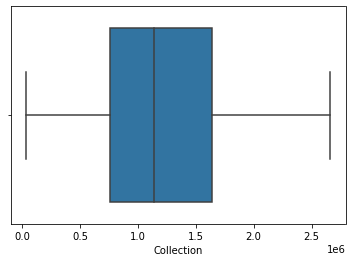

In [51]:
sns.boxplot(imdb_data_frame['Collection'])

In [52]:
imdb_data_frame.head()

TypeError: 'DataFrame' object is not callable

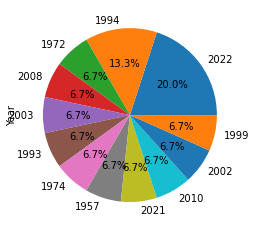

<Figure size 720x360 with 0 Axes>

In [41]:
imdb_data_frame.head["Year"].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='count'>

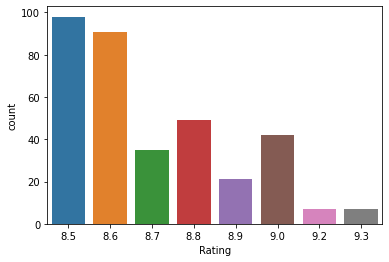

In [63]:
sns.countplot(x='Rating', data=imdb_data_frame)

<AxesSubplot:xlabel='Directors'>

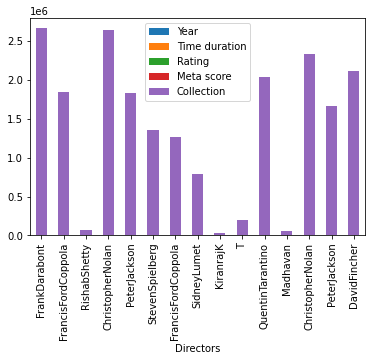

In [72]:
imdb_data_frame.head.plot(x='Directors',kind="bar",stacked = True)

<AxesSubplot:xlabel='Name of movie'>

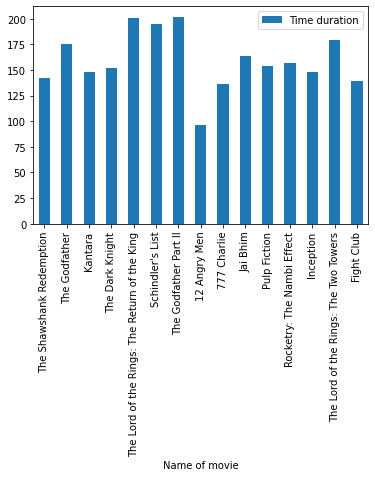

In [76]:
imdb_data_frame.head.plot(x='Name of movie',y='Time duration',kind="bar",stacked = True)

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


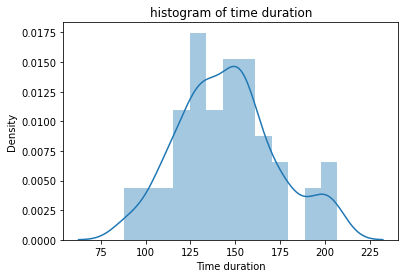

In [150]:
sns.distplot(imdb_data_frame['Time duration'],kde=True)
plt.title('histogram of time duration')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Collection'>

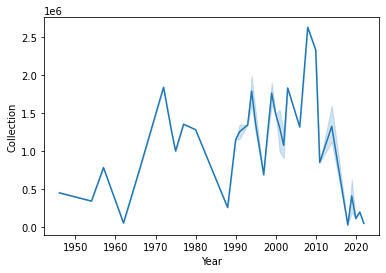

In [151]:
sns.lineplot(x = 'Year', y = 'Collection', data = imdb_data_frame)

<function matplotlib.pyplot.show(close=None, block=None)>

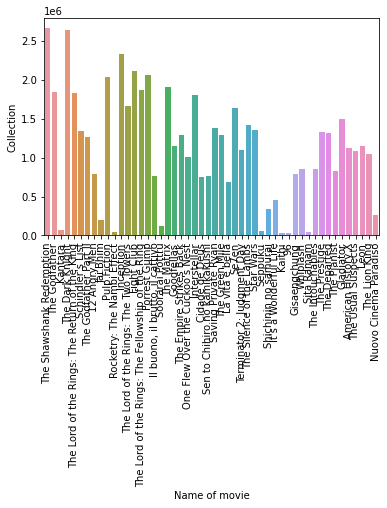

In [153]:
sns.barplot(x='Name of movie', y='Collection', data=imdb_data_frame)
plt.xticks(rotation=90)
plt.show

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Rating'>

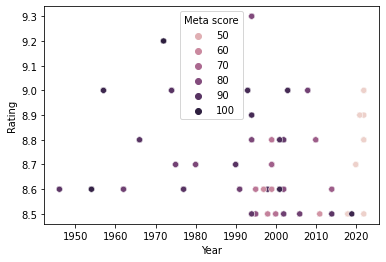

In [77]:
sns.scatterplot(imdb_data_frame['Year'],imdb_data_frame['Rating'],hue=imdb_data_frame['Meta score'])

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Collection'>

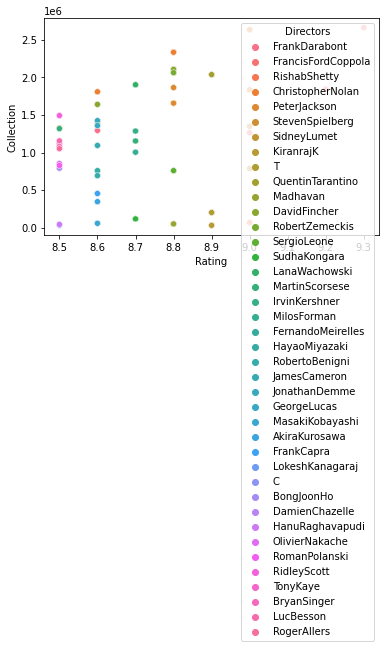

In [44]:
sns.scatterplot(imdb_data_frame["Rating"],imdb_data_frame["Collection"],hue=imdb_data_frame["Directors"])

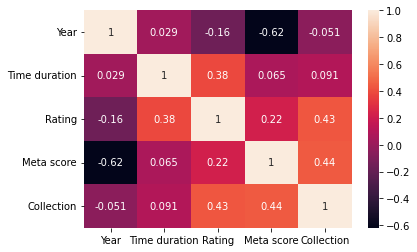

In [160]:
sns.heatmap(imdb_data_frame.corr(),annot=True)
plt.show()